# Lab 1 - Kelly Hwang

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting

In [380]:
import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING
from pandas.tools.plotting import scatter_matrix  # scatter plot matrix
import matplotlib.style as style #aesthetics
from statsmodels.tools.eval_measures import rmse #model evaluation

In [72]:
#suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Objectives
- How can we recommend the best salary (total compensation - bonus) for next head foodball coach?
- Clean data
- Consider the base worksheet and the additional data:
    - stadium size
    - graduation rate (use 2006 cohort and include both GSR and FGR)
    - annual donations to program
- Develop additional vector for each school using last years record
- Build dataframe for analysis
- Conduct an initial data analysis
- Fit a regression model with salary as the response and relevant predictors

Answer the following questions
- what is the recommended salary for the syracuse football coach
- what would his salary be if we were still in the big east? what if we went to the big ten?
- what chools did we drop from our data and why?
- what effect does graduation rate have on the projected salary?
- how good is our model
- what is the single biggest impact on salary size?

Bonus
- Geo visualization of conferences median salary
- hierarchical model based on conference

In [6]:
#import csv data

coaches_base = pd.read_csv("Coaches9.csv")
graduation = pd.read_csv("graduation_rates.csv")
donations = pd.read_csv("ncaa_contributions.csv")
stadium = pd.read_csv("stadium_data.csv")

In [60]:
coaches_base.head()

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,--,$0,--
1,Akron,MAC,Terry Bowden,"$411,000","$412,500","$225,000","$50,000",$0,"$688,500"
2,Alabama,SEC,Nick Saban,"$8,307,000","$8,307,000","$1,100,000","$500,000",$0,"$33,600,000"
3,Alabama at Birmingham,C-USA,Bill Clark,"$900,000","$900,000","$950,000","$165,471",$0,"$3,847,500"
4,Appalachian State,Sun Belt,Scott Satterfield,"$712,500","$712,500","$295,000","$145,000",$0,"$2,160,417"


In [456]:
len(coaches_base)

129

### cleaning coaches dataframe

In [61]:
#lowercase all column names - just my preference
coaches_base.columns = [c.lower() for c in coaches_base.columns]

In [62]:
#view all blank rows for salary
coaches_base[coaches_base['schoolpay']=='--']

,school,conference,coach,schoolpay,totalpay,bonus,bonuspaid,assistantpay,buyout
12,Baylor,Big 12,Matt Rhule,--,--,--,--,$0,--
16,Brigham Young,Ind.,Kalani Sitake,--,--,--,--,$0,--
91,Rice,C-USA,Mike Bloomgren,--,--,--,--,$0,--
99,Southern Methodist,AAC,Sonny Dykes,--,--,--,--,$0,--


In [64]:
#view all blank rows for bonuspaid
coaches_base[coaches_base['bonuspaid']=='--']

,school,conference,coach,schoolpay,totalpay,bonus,bonuspaid,assistantpay,buyout
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,--,$0,--
5,Arizona,Pac-12,Kevin Sumlin,"$1,600,000","$2,000,000","$2,025,000",--,$0,"$10,000,000"
6,Arizona State,Pac-12,Herm Edwards,"$2,000,000","$2,000,000","$3,010,000",--,$0,"$8,166,667"
7,Arkansas,SEC,Chad Morris,"$3,500,000","$3,500,000","$1,000,000",--,$0,"$12,500,000"
9,Army,Ind.,Jeff Monken,932521,932521,--,--,$0,--
12,Baylor,Big 12,Matt Rhule,--,--,--,--,$0,--
14,Boston College,ACC,Steve Addazio,"$2,514,859","$2,514,859",--,--,$0,--
16,Brigham Young,Ind.,Kalani Sitake,--,--,--,--,$0,--
19,Central Florida,AAC,Josh Heupel,"$1,700,000","$1,700,000","$250,000",--,$0,"$3,587,500"
28,Duke,ACC,David Cutcliffe,"$2,540,928","$2,540,928",--,--,$0,--


In [65]:
#drop all rows with no salary data and assign to new dataframe
coaches = coaches_base.drop(coaches_base[coaches_base['schoolpay']=='--'].index)

#replace all -- string with 0's
coaches.replace({'--': 0}, regex=True, inplace=True)

#remove all dollar signs and commas
coaches['schoolpay'] = coaches['schoolpay'].replace({'\$': '', ',': ''}, regex=True)
coaches['totalpay'] = coaches['totalpay'].replace({'\$': '', ',': ''}, regex=True)
coaches['bonus'] = coaches['bonus'].replace({'\$': '', ',': ''}, regex=True)
coaches['bonuspaid'] = coaches['bonuspaid'].replace({'\$': '', ',': ''}, regex=True)
coaches['assistantpay'] = coaches['assistantpay'].replace({'\$': '', ',': ''}, regex=True)
coaches['buyout'] = coaches['buyout'].replace({'\$': '', ',': ''}, regex=True)

In [66]:
coaches.dtypes

school          object
conference      object
coach           object
schoolpay       object
totalpay        object
bonus           object
bonuspaid       object
assistantpay    object
buyout          object
dtype: object

In [67]:
#convert all money related columns to numeric
coaches['schoolpay'] = coaches['schoolpay'].astype(int)
coaches['totalpay'] = coaches['totalpay'].astype(int)
coaches['bonus'] = coaches['bonus'].astype(int)
coaches['bonuspaid'] = coaches['bonuspaid'].astype(int)
coaches['assistantpay'] = coaches['assistantpay'].astype(int)
coaches['buyout'] = coaches['buyout'].astype(int)
coaches.dtypes

school          object
conference      object
coach           object
schoolpay        int32
totalpay         int32
bonus            int32
bonuspaid        int32
assistantpay     int32
buyout           int32
dtype: object

In [73]:
#inspect coaches dataframe after changes
coaches.describe()

,schoolpay,totalpay,bonus,bonuspaid,assistantpay,buyout
count,125.00,125.00,125.00,125.00,125.00,125.00
mean,2410300.71,2417060.76,748296.50,105265.10,0.00,6949955.77
std,1881377.04,1885752.30,662812.43,211405.28,0.00,10086846.94
min,390000.00,390000.00,0.00,0.00,0.00,0.00
25%,801504.00,805850.00,245000.00,0.00,0.00,688500.00
50%,1831580.00,1900008.00,650000.00,25000.00,0.00,2911667.00
75%,3605000.00,3617500.00,1050000.00,100000.00,0.00,9250000.00
max,8307000.00,8307000.00,3100000.00,1350000.00,0.00,68125000.00


### cleaning graduation dataframe

In [53]:
graduation.head()

,school,gsr,fgr
0,Air Force,93.0,NaN
1,Akron,58.0,52.0
2,Alabama,73.0,57.0
3,Alabama at Birmingham,60.0,55.0
4,Appalachian State,68.0,56.0


In [50]:
graduation.dtypes

school     object
gsr       float64
fgr       float64
dtype: object

In [56]:
#view all NA value rows in graduation data
graduation[graduation.isnull().any(axis=1)]

,school,gsr,fgr
0,Air Force,93.0,NaN
9,Army,89.0,NaN
21,Charlotte,NaN,NaN
38,Georgia State,NaN,NaN
69,Navy,84.0,NaN
85,Old Dominion,50.0,NaN
95,South Alabama,NaN,NaN
111,Texas-San Antonio,NaN,NaN


In [74]:
#drop all rows without value in GSR or FGR
graduation.dropna(inplace=True)
graduation.head()

,school,gsr,fgr
1,Akron,58.00,52.00
2,Alabama,73.00,57.00
3,Alabama at Birmingham,60.00,55.00
4,Appalachian State,68.00,56.00
5,Arizona,61.00,59.00


In [75]:
#inspect graduation dataframe after changes
graduation.describe()

,gsr,fgr
count,122.00,122.00
mean,68.94,57.37
std,10.92,10.24
min,44.00,37.00
25%,61.00,52.00
50%,68.00,57.00
75%,75.00,62.75
max,96.00,89.00


### cleaning donations dataframe

In [95]:
donations.head()

,RANK,SCHOOL,CONF.,YEARS,AVE. CONTRIBUTIONS
0,1,Oklahoma State,Big 12,2005-2016,"$45,024,857"
1,2,Florida,SEC,2005-2016,"$41,419,795"
2,3,Oregon,Pac 12,2005-2016,"$36,366,736"
3,4,Texas A&M,SEC,2005-2016,"$35,531,118"
4,5,Texas,Big 12,2005-2016,"$35,418,190"


In [96]:
#lowercase all column names - my preference
donations.columns = [c.lower() for c in donations.columns]

#new column names - my preference
donations.rename(columns={'conf.':'conference', 'ave. contributions':'avg donations'}, inplace=True)

#remove all dollar signs and commas
donations['avg donations'].replace({'\$': '', ',': ''}, regex=True, inplace=True)

#convert donations to numeric
donations['avg donations'] = donations['avg donations'].astype(int)

#convert rank to non numeric
donations['rank'] = donations['rank'].astype('category')

In [97]:
donations.dtypes

rank             category
school             object
conference         object
years              object
avg donations       int32
dtype: object

In [98]:
#inspect donations dataframe after changes
donations.describe()

,avg donations
count,52.00
mean,19888690.77
std,9043722.36
min,6572169.00
25%,12574589.25
50%,17283368.50
75%,24635580.50
max,45024857.00


### cleaning stadium dataframe

In [101]:
stadium.head()

,stadium,city,state,team-original,team,conference,capacity,built,expanded,div,latitude,longitude
0,Michigan Stadium,Ann Arbor,MI,Michigan,Michigan,Big Ten,107601,1927,2015,fbs,42.27,-83.75
1,Beaver Stadium,University Park,PA,Penn State,Penn State,Big Ten,106572,1960,2001,fbs,40.81,-77.86
2,Ohio Stadium,Columbus,OH,Ohio State,Ohio State,Big Ten,104944,1922,2014,fbs,40.00,-83.02
3,Kyle Field,College Station,TX,Texas A&M,Texas A&M,SEC,102733,1927,2015,fbs,30.61,-96.34
4,Neyland Stadium,Knoxville,TN,Tennessee,Tennessee,SEC,102455,1921,2010,fbs,35.95,-83.93


In [102]:
#check for NA values
#mostly just in the 'expanded' column, which isn't a datapoint that is important for this analysis anyways
stadium[stadium.isnull().any(axis=1)]

,stadium,city,state,team-original,team,conference,capacity,built,expanded,div,latitude,longitude
27,Lincoln Financial Field,Philadelphia,PA,Temple,Temple,American,68532,2003,NaN,fbs,39.90,-75.17
28,Heinz Field,Pittsburgh,PA,Pittsburgh,Pittsburgh,ACC,68400,2001,NaN,fbs,40.45,-80.02
30,Raymond James Stadium,Tampa,FL,USF,South Florida,American,65857,1998,NaN,fbs,27.98,-82.50
32,Alamodome,San Antonio,TX,UTSA,Texas-San Antonio,C-USA,65000,1993,NaN,fbs,29.42,-98.48
52,TCF Bank Stadium,Minneapolis,MN,Minnesota,Minnesota,Big Ten,52525,2009,NaN,fbs,44.98,-93.22
62,Stanford Stadium,Stanford,CA,Stanford,Stanford,Pac-12,50000,2006,NaN,fbs,37.43,-122.16
63,Carrier Dome,Syracuse,NY,Syracuse,Syracuse,ACC,49250,1980,NaN,fbs,43.04,-76.14
65,Rice Stadium,Houston,TX,Rice,Rice,C-USA,47000,1950,NaN,fbs,29.72,-95.41
66,Falcon Stadium,Colorado Springs,CO,Air Force,Air Force,Mountain West,46692,1962,NaN,fbs,39.00,-104.84
68,Bright House Networks Stadium,Orlando,FL,UCF,Central Florida,American,45323,2007,NaN,fbs,28.61,-81.19


In [103]:
stadium.dtypes

stadium           object
city              object
state             object
team-original     object
team              object
conference        object
capacity           int64
built              int64
expanded          object
div               object
latitude         float64
longitude        float64
dtype: object

In [104]:
#change year built to object datatype
stadium['built'] = stadium['built'].astype('object')

In [105]:
stadium.dtypes

stadium           object
city              object
state             object
team-original     object
team              object
conference        object
capacity           int64
built             object
expanded          object
div               object
latitude         float64
longitude        float64
dtype: object

### importing and cleaning more data - win loss ratios 2017

In [139]:
season2017 = pd.read_csv("2017-season.csv")

In [140]:
season2017.head()

,school,win,loss,pct
0,Air Force,5,7,0.42
1,Akron,7,7,0.50
2,Alabama,13,1,0.93
3,Alabama at Birmingham,4,7,0.36
4,Appalachian State,9,4,0.69


In [141]:
season2017.dtypes

school     object
win         int64
loss        int64
pct       float64
dtype: object

In [143]:
season2017.describe()

,win,loss,pct
count,130.00,130.00,130.00
mean,6.58,5.96,0.52
std,3.08,2.55,0.22
min,0.00,0.00,0.00
25%,4.00,4.00,0.36
50%,7.00,6.00,0.54
75%,9.00,7.00,0.69
max,13.00,12.00,1.00


### merging the data

In [144]:
#view column names for each df
print(coaches.columns)
print(graduation.columns)
print(donations.columns)
print(stadium.columns)
print(season2017.columns)

Index(['school', 'conference', 'coach', 'schoolpay', 'totalpay', 'bonus',
       'bonuspaid', 'assistantpay', 'buyout'],
      dtype='object')
Index(['school', 'gsr', 'fgr'], dtype='object')
Index(['rank', 'school', 'conference', 'years', 'avg donations'], dtype='object')
Index(['stadium', 'city', 'state', 'team-original', 'team', 'conference',
       'capacity', 'built', 'expanded', 'div', 'latitude', 'longitude'],
      dtype='object')
Index(['school', 'win', 'loss', 'pct'], dtype='object')


In [127]:
#left join graduation data on coaches by school name (make new df)
df = pd.merge(coaches, graduation, left_on='school', right_on='school', how = 'left')

In [128]:
#join donations data on df by school name
df = pd.merge(df, donations, left_on='school', right_on='school', how = 'left')

In [129]:
#join stadium data on df by school name
df = pd.merge(df, stadium, left_on='school', right_on='team', how = 'left')

In [145]:
#join season 2017 win loss data on df by school name
df = pd.merge(df, season2017, left_on='school', right_on='school', how = 'left')

In [146]:
df.head()

,school,conference,coach,schoolpay,totalpay,bonus,bonuspaid,assistantpay,buyout,gsr,...,state,capacity,built,expanded,div,latitude,longitude,win,loss,pct
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,0,0,0,nan,...,CO,46692.00,1962,NaN,fbs,39.00,-104.84,5,7,0.42
1,Akron,MAC,Terry Bowden,411000,412500,225000,50000,0,688500,58.00,...,OH,30000.00,2009,NaN,fbs,41.07,-81.51,7,7,0.50
2,Alabama,SEC,Nick Saban,8307000,8307000,1100000,500000,0,33600000,73.00,...,AL,101821.00,1929,2010,fbs,33.21,-87.55,13,1,0.93
3,Alabama at Birmingham,C-USA,Bill Clark,900000,900000,950000,165471,0,3847500,60.00,...,NaN,nan,NaN,NaN,NaN,nan,nan,4,7,0.36
4,Appalachian State,Sun Belt,Scott Satterfield,712500,712500,295000,145000,0,2160417,68.00,...,NC,24050.00,1962,2009,fbs,36.21,-81.69,9,4,0.69


In [131]:
#drop duplicate conference columns
df.drop(['conference_y', 'conference'], axis=1, inplace=True)

#drop team-original and team columns
df.drop(['team-original', 'team'], axis=1, inplace=True)

#rename conference_x
df.rename(columns={'conference_x':'conference'}, inplace=True)

In [132]:
df.head()

,school,conference,coach,schoolpay,totalpay,bonus,bonuspaid,assistantpay,buyout,gsr,...,avg donations,stadium,city,state,capacity,built,expanded,div,latitude,longitude
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,0,0,0,nan,...,nan,Falcon Stadium,Colorado Springs,CO,46692.00,1962,NaN,fbs,39.00,-104.84
1,Akron,MAC,Terry Bowden,411000,412500,225000,50000,0,688500,58.00,...,nan,Summa Field at InfoCision Stadium,Akron,OH,30000.00,2009,NaN,fbs,41.07,-81.51
2,Alabama,SEC,Nick Saban,8307000,8307000,1100000,500000,0,33600000,73.00,...,29065750.00,Bryant–Denny Stadium,Tuscaloosa,AL,101821.00,1929,2010,fbs,33.21,-87.55
3,Alabama at Birmingham,C-USA,Bill Clark,900000,900000,950000,165471,0,3847500,60.00,...,nan,NaN,NaN,NaN,nan,NaN,NaN,NaN,nan,nan
4,Appalachian State,Sun Belt,Scott Satterfield,712500,712500,295000,145000,0,2160417,68.00,...,nan,Kidd Brewer Stadium,Boone,NC,24050.00,1962,2009,fbs,36.21,-81.69


In [149]:
df.describe()

,schoolpay,totalpay,bonus,bonuspaid,assistantpay,buyout,gsr,fgr,avg donations,capacity,latitude,longitude,win,loss,pct
count,125.00,125.00,125.00,125.00,125.00,125.00,117.00,117.00,51.00,122.00,122.00,122.00,125.00,125.00,125.00
mean,2410300.71,2417060.76,748296.50,105265.10,0.00,6949955.77,68.69,57.24,19795658.98,51662.10,36.84,-92.26,6.69,5.86,0.52
std,1881377.04,1885752.30,662812.43,211405.28,0.00,10086846.94,10.75,9.88,9108547.41,23519.95,4.90,14.74,3.05,2.50,0.22
min,390000.00,390000.00,0.00,0.00,0.00,0.00,44.00,37.00,6572169.00,15314.00,21.37,-157.93,0.00,0.00,0.00
25%,801504.00,805850.00,245000.00,0.00,0.00,688500.00,61.00,52.00,12488029.50,30878.50,33.43,-97.42,5.00,4.00,0.42
50%,1831580.00,1900008.00,650000.00,25000.00,0.00,2911667.00,68.00,57.00,16575714.00,49625.00,36.94,-87.23,7.00,6.00,0.54
75%,3605000.00,3617500.00,1050000.00,100000.00,0.00,9250000.00,75.00,62.00,24609826.50,65244.50,40.80,-82.16,9.00,7.00,0.69
max,8307000.00,8307000.00,3100000.00,1350000.00,0.00,68125000.00,94.00,89.00,45024857.00,107601.00,47.65,-71.17,13.00,12.00,1.00


Using this view I can see that out of the total 125 schools we have, after left merging our other datasets, only 117 of them have GSR/FGR info, 51 have donation info, and 122 have stadium info.

In [159]:
df.columns

Index(['school', 'conference', 'coach', 'schoolpay', 'totalpay', 'bonus',
       'bonuspaid', 'assistantpay', 'buyout', 'gsr', 'fgr', 'rank', 'years',
       'avg donations', 'stadium', 'city', 'state', 'capacity', 'built',
       'expanded', 'div', 'latitude', 'longitude', 'win', 'loss', 'pct'],
      dtype='object')

In [158]:
#find which rows don't have state or location data
df[df['city'].isna()]

,school,conference,coach,schoolpay,totalpay,bonus,bonuspaid,assistantpay,buyout,gsr,...,state,capacity,built,expanded,div,latitude,longitude,win,loss,pct
3,Alabama at Birmingham,C-USA,Bill Clark,900000,900000,950000,165471,0,3847500,60.00,...,NaN,nan,NaN,NaN,NaN,nan,nan,4,7,0.36
22,Coastal Carolina,Sun Belt,Joe Moglia,400000,400000,800000,25000,0,516667,66.00,...,NaN,nan,NaN,NaN,NaN,nan,nan,3,9,0.25
48,Liberty,Ind.,Turner Gill,947281,947281,0,0,0,0,65.00,...,NaN,nan,NaN,NaN,NaN,nan,nan,6,5,0.55


In [175]:
#manually populate city, state, latitude (estimate), longitude (estimate)
#using https://www.latlong.net/convert-address-to-lat-long.html for coordinates
#AAB - Birmingham, AL, 33.51, -86.81
#CC - Conway, SC, 33.83, -79.05
#L - Lynchburg, VA, 37.41, -79.14

df.loc[3, 'city'] = 'Birmingham'
df.loc[3, 'state'] = 'AL'
df.loc[3, 'latitude'] = 33.51
df.loc[3, 'longitude'] = -86.81

df.loc[22, 'city'] = 'Conway'
df.loc[22, 'state'] = 'SC'
df.loc[22, 'latitude'] = 33.83
df.loc[22, 'longitude'] = -79.05

df.loc[48, 'city'] = 'Lynchburg'
df.loc[48, 'state'] = 'VA'
df.loc[48, 'latitude'] = 37.41
df.loc[48, 'longitude'] = -79.14

In [177]:
#find which rows don't have capacity data
df[df['capacity'].isna()]

,school,conference,coach,schoolpay,totalpay,bonus,bonuspaid,assistantpay,buyout,gsr,...,state,capacity,built,expanded,div,latitude,longitude,win,loss,pct
3,Alabama at Birmingham,C-USA,Bill Clark,900000,900000,950000,165471,0,3847500,60.00,...,AL,nan,NaN,NaN,NaN,33.51,-86.81,4,7,0.36
22,Coastal Carolina,Sun Belt,Joe Moglia,400000,400000,800000,25000,0,516667,66.00,...,SC,nan,NaN,NaN,NaN,33.83,-79.05,3,9,0.25
48,Liberty,Ind.,Turner Gill,947281,947281,0,0,0,0,65.00,...,VA,nan,NaN,NaN,NaN,37.41,-79.14,6,5,0.55


In [178]:
#manually populate stadium capacity data (gpogled)
#AAB 71,594
#CC 15,000
#L 21,088

df.loc[3, 'capacity'] = 71594
df.loc[22, 'capacity'] = 15000
df.loc[48, 'capacity'] = 21088

In [186]:
#find which rows don't have graduation data
df[df['gsr'].isna()]

,school,conference,coach,schoolpay,totalpay,bonus,bonuspaid,assistantpay,buyout,gsr,...,state,capacity,built,expanded,div,latitude,longitude,win,loss,pct
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,0,0,0,nan,...,CO,46692.00,1962,NaN,fbs,39.00,-104.84,5,7,0.42
9,Army,Ind.,Jeff Monken,932521,932521,0,0,0,0,nan,...,NY,38000.00,1924,2001,fbs,41.39,-73.96,10,3,0.77
19,Charlotte,C-USA,Brad Lambert,625000,625000,120000,0,0,556389,nan,...,NC,15314.00,2013,NaN,fbs,35.31,-80.74,1,11,0.08
36,Georgia State,Sun Belt,Shawn Elliott,569000,569000,220000,60000,0,1500000,nan,...,GA,28155.00,1992,NaN,fbs,33.76,-84.40,7,5,0.58
67,Navy,AAC,Ken Niumatalolo,2163000,2163000,0,0,0,0,nan,...,MD,34000.00,1959,2005,fbs,38.98,-76.51,7,6,0.54
83,Old Dominion,C-USA,Bobby Wilder,654667,654667,504895,0,0,1200000,nan,...,VA,20118.00,1936,2009,fbs,36.89,-76.31,5,7,0.42
92,South Alabama,Sun Belt,Steve Campbell,600000,600000,295000,0,0,918333,nan,...,AL,33500.00,1948,2009,fbs,30.67,-88.08,4,8,0.33
106,Texas-San Antonio,C-USA,Frank Wilson,1100000,1100000,185000,17500,0,3562500,nan,...,TX,65000.00,1993,NaN,fbs,29.42,-98.48,6,5,0.55


In [191]:
#manually add GSR data from googling
#unable to find FGR for these school so using GSR in both columns
#0 air force 78, 
#9 army 82
#19 charlotte 55
#36 georgia state 53
#67 navy 90
#83 old dominion 52
#92 south alabama 38
#106 texas san antonio 31

df.loc[0, 'gsr'] = 78
df.loc[0, 'fgr'] = 78
df.loc[9, 'gsr'] = 82
df.loc[9, 'fgr'] = 82
df.loc[19, 'gsr'] = 55
df.loc[19, 'fgr'] = 55
df.loc[36, 'gsr'] = 53
df.loc[36, 'fgr'] = 53
df.loc[67, 'gsr'] = 90
df.loc[67, 'fgr'] = 90
df.loc[83, 'gsr'] = 52
df.loc[83, 'fgr'] = 52
df.loc[92, 'gsr'] = 38
df.loc[92, 'fgr'] = 38
df.loc[106, 'gsr'] = 31
df.loc[106, 'fgr'] = 31

In [194]:
#divide gsr and fgr by 100 to make true percent
df['gsr'] = df['gsr']/100
df['fgr'] = df['fgr']/100

In [195]:
df.head()

,school,conference,coach,schoolpay,totalpay,bonus,bonuspaid,assistantpay,buyout,gsr,...,state,capacity,built,expanded,div,latitude,longitude,win,loss,pct
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,0,0,0,0.78,...,CO,46692.00,1962,NaN,fbs,39.00,-104.84,5,7,0.42
1,Akron,MAC,Terry Bowden,411000,412500,225000,50000,0,688500,0.58,...,OH,30000.00,2009,NaN,fbs,41.07,-81.51,7,7,0.50
2,Alabama,SEC,Nick Saban,8307000,8307000,1100000,500000,0,33600000,0.73,...,AL,101821.00,1929,2010,fbs,33.21,-87.55,13,1,0.93
3,Alabama at Birmingham,C-USA,Bill Clark,900000,900000,950000,165471,0,3847500,0.60,...,AL,71594.00,NaN,NaN,NaN,33.51,-86.81,4,7,0.36
4,Appalachian State,Sun Belt,Scott Satterfield,712500,712500,295000,145000,0,2160417,0.68,...,NC,24050.00,1962,2009,fbs,36.21,-81.69,9,4,0.69


In [245]:
#drop assistantpay column (all 0's)
df.drop('assistantpay', axis=1, inplace = True)

In [246]:
df.describe()

,schoolpay,totalpay,bonus,bonuspaid,buyout,gsr,fgr,avg donations,capacity,latitude,longitude,win,loss,pct
count,125.00,125.00,125.00,125.00,125.00,125.00,125.00,51.00,125.00,125.00,125.00,125.00,125.00,125.00
mean,2410300.71,2417060.76,748296.50,105265.10,6949955.77,0.68,0.57,19795658.98,51283.66,36.79,-92.00,6.69,5.86,0.52
std,1881377.04,1885752.30,662812.43,211405.28,10086846.94,0.12,0.11,9108547.41,23690.55,4.86,14.66,3.05,2.50,0.22
min,390000.00,390000.00,0.00,0.00,0.00,0.31,0.31,6572169.00,15000.00,21.37,-157.93,0.00,0.00,0.00
25%,801504.00,805850.00,245000.00,0.00,688500.00,0.60,0.52,12488029.50,30600.00,33.46,-97.37,5.00,4.00,0.42
50%,1831580.00,1900008.00,650000.00,25000.00,2911667.00,0.67,0.57,16575714.00,49250.00,36.89,-86.81,7.00,6.00,0.54
75%,3605000.00,3617500.00,1050000.00,100000.00,9250000.00,0.75,0.63,24609826.50,65326.00,40.76,-81.78,9.00,7.00,0.69
max,8307000.00,8307000.00,3100000.00,1350000.00,68125000.00,0.94,0.90,45024857.00,107601.00,47.65,-71.17,13.00,12.00,1.00


In [453]:
df.dtypes

school             object
conference         object
coach              object
schoolpay           int32
totalpay            int32
bonus               int32
bonuspaid           int32
buyout              int32
gsr               float64
fgr               float64
rank             category
years              object
avg donations     float64
stadium            object
city               object
state              object
capacity          float64
built              object
expanded           object
div                object
latitude          float64
longitude         float64
win                 int64
loss                int64
pct               float64
uniform           float64
dtype: object

### data exploration and analysis

In [222]:
#plotting aesthetics
style.use('seaborn-notebook')
style.use('ggplot')

In [464]:
#average school salary by conference sorted high to low
avg_pay_conf = df.groupby('conference')['schoolpay'].mean().sort_values(ascending = False)
df.groupby('conference')['schoolpay'].agg(['mean','count']).sort_values(by='mean', ascending = False)

,mean,count
conference,,
SEC,4642080.21,14
Big Ten,4304013.71,14
Big 12,4016755.67,9
ACC,3409628.86,14
Pac-12,2856577.75,12
AAC,1656267.70,10
Mt. West,1000642.00,12
Ind.,985816.00,5
C-USA,839518.54,13


In [249]:
avg_pay_conf = avg_pay_conf.reset_index()

Text(0.5,1,'Avg Pay By Conference')

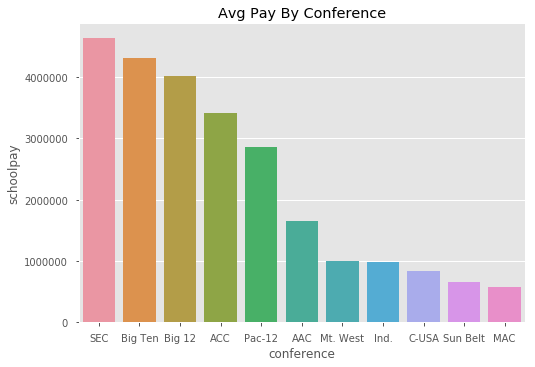

In [269]:
sns.barplot(x = 'conference', y = 'schoolpay', data = avg_pay_conf)
plt.title('Avg Pay By Conference')

In [252]:
#average school salary by state sorted high to low
avg_pay_state = df.groupby('state')['schoolpay'].mean().sort_values(ascending = False)
df.groupby('state')['schoolpay'].mean().sort_values(ascending = False)

state
NE   5000000.00
IA   4100000.00
WA   3937500.00
PA   3908859.00
OK   3772725.67
WI   3750000.00
SC   3601666.67
MN   3550000.00
AL   3463400.00
IL   3084411.67
TX   3024410.22
KY   2926811.33
FL   2824723.00
MI   2761883.40
GA   2720654.50
KS   2600554.50
TN   2515006.75
MO   2350000.00
UT   2343958.50
MD   2337500.00
VA   2287987.00
OR   2200004.00
NJ   2200000.00
WV   2183785.00
AR   2162500.00
CA   2107215.43
IN   2048831.75
MS   2033333.33
CO   1854500.00
AZ   1800000.00
NC   1769644.00
ID   1650010.00
OH   1639798.12
MA   1507429.50
LA   1413800.00
WY   1412000.00
NY   1263075.67
CT   1100000.00
NM    621165.00
NV    550000.00
HI    425004.00
Name: schoolpay, dtype: float64

In [253]:
avg_pay_state = avg_pay_state.reset_index()

Text(0.5,1,'Avg Pay By State')

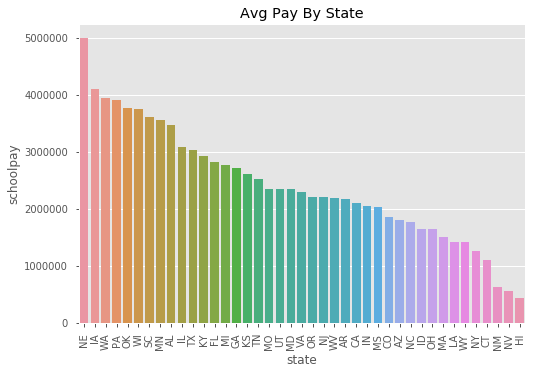

In [268]:
sns.barplot(x = 'state', y = 'schoolpay', data = avg_pay_state)
plt.xticks(rotation = 'vertical')
plt.title('Avg Pay By State')

In [460]:
#average school salary by state sorted high to low
df.groupby('state')['school'].count().sort_values(ascending = False)

state
TX    9
OH    8
FL    7
NC    7
CA    7
LA    5
MI    5
AL    5
TN    4
IN    4
GA    4
VA    4
SC    3
OK    3
NY    3
IL    3
MS    3
KY    3
CO    3
MA    2
IA    2
KS    2
AR    2
WV    2
MD    2
WA    2
PA    2
UT    2
NM    2
NV    2
OR    2
AZ    2
CT    1
WY    1
HI    1
ID    1
MN    1
NE    1
NJ    1
WI    1
MO    1
Name: school, dtype: int64

In [263]:
#function to plot correlation ellipse graph
#source: https://stackoverflow.com/questions/34556180/how-can-i-plot-a-correlation-matrix-as-a-set-of-ellipses-similar-to-the-r-open

from matplotlib.collections import EllipseCollection

def plot_corr_ellipses(data, ax=None, **kwargs):
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    if ax is None:
        fig, ax = plt.subplots(1, 1, subplot_kw={'aspect':'equal'})
        ax.set_xlim(-0.5, M.shape[1] - 0.5)
        ax.set_ylim(-0.5, M.shape[0] - 0.5)
    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T
    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel()
    h = 1 - np.abs(M).ravel()
    a = 45 * np.sign(M).ravel()
    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)
    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)
    return ec

In [257]:
corr = df.corr()

Text(0.5,1,'Correlation Ellipse Plot')

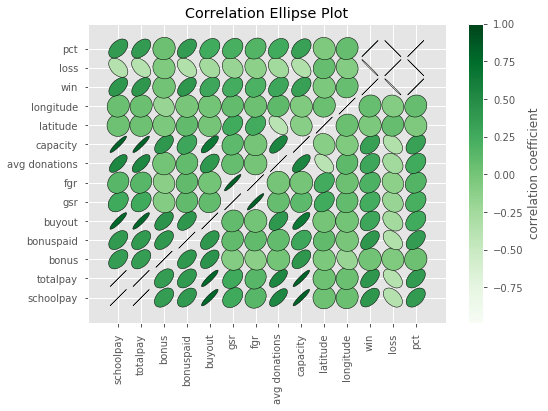

In [270]:
fig, ax = plt.subplots(1,1)
m = plot_corr_ellipses(corr, ax=ax, cmap = 'Greens', edgecolors = 'black')
cb = fig.colorbar(m)
cb.set_label('correlation coefficient')
ax.margins(0.1)
plt.title('Correlation Ellipse Plot')

- large positive correlations: pay & stadium capacity
- small positive correlations: pay & wins

### regression models

In [426]:
#set rnd seed for reproducibility
np.random.seed(777)
df['uniform'] = uniform.rvs(loc = 0, scale = 1, size = len(df))

In [427]:
#split training and testing
df_train = df[df['uniform'] >= 0.33]
df_test = df[df['uniform'] < 0.33]

In [428]:
#check training and testing
print('\ntraining data frame (rows, columns): ',df_train.shape)
print(df_train.head())
# check test data frame
print('\ntesting data frame (rows, columns): ',df_test.shape)
print(df_test.head())


training data frame (rows, columns):  (83, 26)
                  school conference              coach  schoolpay  totalpay  \
3  Alabama at Birmingham      C-USA         Bill Clark     900000    900000   
4      Appalachian State   Sun Belt  Scott Satterfield     712500    712500   
5                Arizona     Pac-12       Kevin Sumlin    1600000   2000000   
6          Arizona State     Pac-12       Herm Edwards    2000000   2000000   
7               Arkansas        SEC        Chad Morris    3500000   3500000   

     bonus  bonuspaid    buyout  gsr  fgr   ...   capacity built  expanded  \
3   950000     165471   3847500 0.60 0.55   ...   71594.00   NaN       NaN   
4   295000     145000   2160417 0.68 0.56   ...   24050.00  1962      2009   
5  2025000          0  10000000 0.61 0.59   ...   51811.00  1928      1988   
6  3010000          0   8166667 0.67 0.52   ...   71706.00  1958      1998   
7  1000000          0  12500000 0.54 0.39   ...   72000.00  1938      2006   

   div l

In [429]:
#first model attempt using capacity, win loss ratio, graduation rates
model1 = str('schoolpay ~ capacity + pct + gsr + fgr')

In [430]:
#fit the model to training set
trained_model1 = smf.ols(model1, data = df_train).fit()

In [432]:
#summary of model fit to training set
print(trained_model1.summary())

                            OLS Regression Results                            
Dep. Variable:              schoolpay   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     54.72
Date:                Sat, 02 Feb 2019   Prob (F-statistic):           6.83e-22
Time:                        22:06:12   Log-Likelihood:                -1258.2
No. Observations:                  83   AIC:                             2526.
Df Residuals:                      78   BIC:                             2539.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -2.67e+06   6.68e+05     -3.998      0.0

capacity p-value 0.00 implies the stadium capacity effect on salary is statistically significant

gsr/fgr p-value > 0.05 implies graduation rates effect on salary is statistically insignificant and can be dropped from the model

win rate (pct) p-value > 0.05 implies win loss ratio effect on salary is also statistically insignificant and can be dropped from the model

r squared value 74% implies ~74% of variation in salary is explained by these variables

C:\Users\kyhwa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


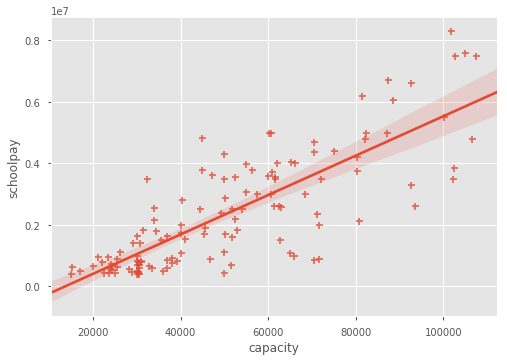

In [433]:
#plot the regression line for just capacity affects on schoolpay
sns.regplot(x = 'capacity', y = 'schoolpay', data = df, marker='+')

In [434]:
#new model with only capacity
model2 = str('schoolpay ~ capacity')
trained_model2 = smf.ols(model2, data = df_train).fit()
print(trained_model2.summary())

                            OLS Regression Results                            
Dep. Variable:              schoolpay   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     194.1
Date:                Sat, 02 Feb 2019   Prob (F-statistic):           3.28e-23
Time:                        22:07:02   Log-Likelihood:                -1263.0
No. Observations:                  83   AIC:                             2530.
Df Residuals:                      81   BIC:                             2535.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.255e+05    2.5e+05     -3.297      0.0

intercept = -825,500

slope = 59.61

the positive slope indicates that stadium size has a positive effect on salary outcomes

using only capacity the model still accounts for 70% of variation in salary, however the model is not precise as std error is rather high at 4.279.

equation = -825500 + 59.63*capacity

In [339]:
#df[df['school']=='Syracuse']
df.loc[[98],['school','schoolpay', 'capacity']]

,school,schoolpay,capacity
98,Syracuse,2401206,49250.00


In [435]:
#manually calculate Syracuse prediction using model2
predicted_calc = -825500 + 59.64*49250
print('actual salary for Syracuse: $',
     "{:,}".format(2401206))
print('recommended salary for Syracuse: $', 
      "{:,}".format(predicted_calc))
print('difference: $', "{:,}".format(2401206-predicted_calc))

actual salary for Syracuse: $ 2,401,206
recommended salary for Syracuse: $ 2,111,770.0
difference: $ 289,436.0


In [439]:
#calculate all predicted salaries using model2
predicted_salaries2 = trained_model2.predict(df_test['capacity'])
true_salaries2 = df_test['schoolpay']

In [441]:
#compare and evaluate predicted vs actual for model2
df_eval2 = df_test[['school', 'schoolpay']].copy()
df_eval2['predicted'] = predicted_salaries2
df_eval2['difference'] = df_eval2['schoolpay'] - df_eval2['predicted']
df_eval2['capacity'] = df_test[['capacity']].copy()

In [443]:
df_eval2.head()

,school,schoolpay,predicted,difference,capacity
0,Air Force,885000,1957752.93,-1072752.93,46692.00
1,Akron,411000,962760.55,-551760.55,30000.00
2,Alabama,8307000,5243934.03,3063065.97,101821.00
8,Arkansas State,825000,1020223.56,-195223.56,30964.00
10,Auburn,6700000,4387353.60,2312646.40,87451.00


In [446]:
#average difference between actual and predicted values
print('avg error for model 2: $',
      "{:,}".format(round(df_eval2['difference'].mean(), 2)))

avg error for model 2: $ 532,272.53


Text(0,0.5,'schoolpay')

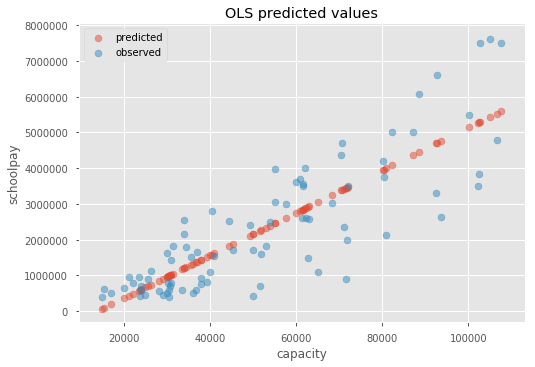

In [436]:
#plot predicted values vs actual values for model2
plt.scatter(df_train['capacity'], trained_model2.predict(), 
            alpha = 0.5, label = 'predicted')
#plot observed values
plt.scatter(df_train['capacity'], df_train['schoolpay'], 
           alpha = 0.5, label = 'observed')
plt.legend()
plt.title('OLS predicted values')
plt.xlabel('capacity')
plt.ylabel('schoolpay')

In [465]:
#new model adding back win loss ratio
model3 = str('schoolpay ~ capacity + pct')
trained_model3 = smf.ols(model3, data = df_train).fit()
print(trained_model3.summary())

                            OLS Regression Results                            
Dep. Variable:              schoolpay   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     99.38
Date:                Sat, 02 Feb 2019   Prob (F-statistic):           2.06e-22
Time:                        23:40:19   Log-Likelihood:                -1261.9
No. Observations:                  83   AIC:                             2530.
Df Residuals:                      80   BIC:                             2537.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.122e+06   3.22e+05     -3.479      0.0

In [466]:
df[df['school']=='Syracuse']

,school,conference,coach,schoolpay,totalpay,bonus,bonuspaid,buyout,gsr,fgr,...,capacity,built,expanded,div,latitude,longitude,win,loss,pct,uniform
98,Syracuse,ACC,Dino Babers,2401206,2401206,0,0,0,0.77,0.64,...,49250.00,1980,NaN,fbs,43.04,-76.14,4,8,0.33,0.68


In [468]:
#manually calculate Syracuse prediction using model3
predicted_calc3 = -1122000 + 57.68*49250 + 785000*0.33
print('actual salary for Syracuse: $',
     "{:,}".format(2401206))
print('recommended salary for Syracuse: $', 
      "{:,}".format(predicted_calc3))
print('difference: $', "{:,}".format(2401206-predicted_calc3))

actual salary for Syracuse: $ 2,401,206
recommended salary for Syracuse: $ 1,977,790.0
difference: $ 423,416.0


In [448]:
#calculate all predicted salaries using model3
predicted_salaries3 = trained_model3.predict(df_test[['capacity', 'pct']])

In [449]:
#compare and evaluate predicted vs actual for model3
df_eval3 = df_test[['school', 'schoolpay']].copy()
df_eval3['predicted'] = predicted_salaries3
df_eval3['difference'] = df_eval3['schoolpay'] - df_eval3['predicted']
df_eval3['capacity'] = df_test[['capacity']].copy()

In [450]:
#average difference between actual and predicted values
print('avg error for model 3: $',
      "{:,}".format(round(df_eval3['difference'].mean(), 2)))

avg error for model 3: $ 485,451.0


Text(0,0.5,'schoolpay')

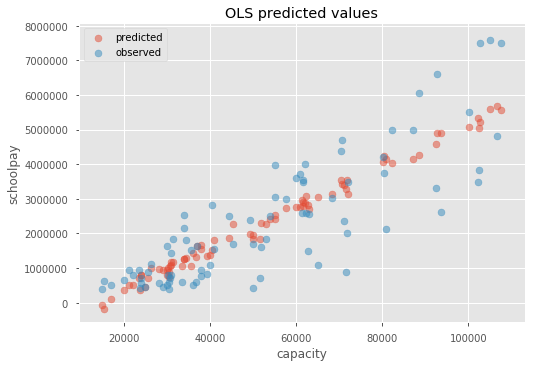

In [451]:
#plot predicted values vs actual values for model3
plt.scatter(df_train['capacity'], trained_model3.predict(), 
            alpha = 0.5, label = 'predicted')
#plot observed values
plt.scatter(df_train['capacity'], df_train['schoolpay'], 
           alpha = 0.5, label = 'observed')
plt.legend()
plt.title('OLS predicted values')
plt.xlabel('capacity')
plt.ylabel('schoolpay')